In [2]:
import keras
import numpy
import matplotlib.pyplot as plotter
import PIL
import json
import time
import tensorflow
from PIL import ImageDraw

In [3]:
model = keras.Sequential()

# Rebuild the vgg16 layers without the max pooling

model.add(keras.layers.Input((224, 224, 3)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(keras.layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(keras.layers.Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(keras.layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(keras.layers.Conv2D(512, kernel_size=(3,3), padding="same", activation="relu"))
    
# Final layer to get the density map
model.add(keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.Conv2D(1, (3, 3),  padding="same", activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 256)     295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 512)     1180160   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 512)     2359808   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 224, 224, 128)     589952    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 224, 224, 1)       1

In [16]:
# Load the pretrained weights (Trained with 2k images)
model.load_weights("Latest_Weights (2k images).h5")
# model.load_weights("my_weights.h5")

In [17]:
def load_image(prediction_images, index, filename):
    image_load = PIL.Image.open(filename)        
    width, height = image_load.size

    # Resize the image
    prediction_images[index] = numpy.asarray(image_load.resize((224, 224)))[:,:,0:3]

In [24]:
prediction_images = numpy.full((7, 224, 224, 3), 0)

load_image(prediction_images, 0, "Images/3996.jpg")
load_image(prediction_images, 1, "Images/4829.jpg")
load_image(prediction_images, 2, "Images/0248.jpg")
load_image(prediction_images, 3, "Images/0257.jpg")
load_image(prediction_images, 4, "Images/2844.jpg")
load_image(prediction_images, 5, "Images/2276.jpg")
load_image(prediction_images, 6, "Images/0212.jpg")

In [25]:
start_time = time.time()
prediction = model.predict(prediction_images, verbose=1)
print("Prediction Time taken: ", time.time() - start_time)

1/1 [==============================] - 0s 0s/step
Prediction Time taken:  9.827806949615479


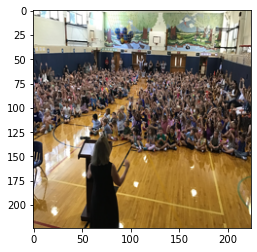

In [26]:
plotter.imshow(prediction_images[0])

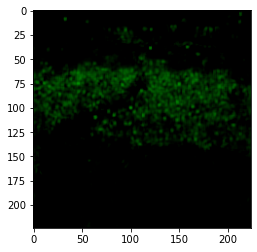

In [27]:
# Create the predicted density map
predicted_density = numpy.full((224, 224, 3), 0)

predicted_density[:,:,1] = prediction[0][:,:,0]

plotter.imshow(predicted_density)

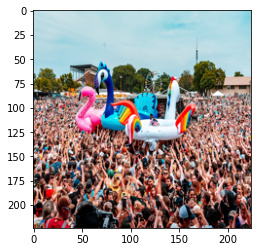

In [28]:
plotter.imshow(prediction_images[1])

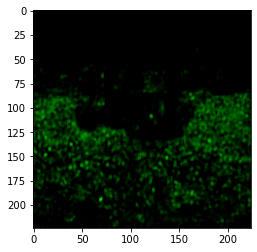

In [29]:
# Create the predicted density map
predicted_density = numpy.full((224, 224, 3), 0)

predicted_density[:,:,1] = prediction[1][:,:,0]

plotter.imshow(predicted_density)

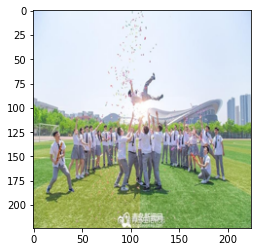

In [27]:
plotter.imshow(prediction_images[2])

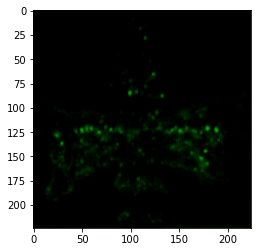

In [28]:
# Create the predicted density map
predicted_density = numpy.full((224, 224, 3), 0)

predicted_density[:,:,1] = prediction[2][:,:,0]

plotter.imshow(predicted_density)

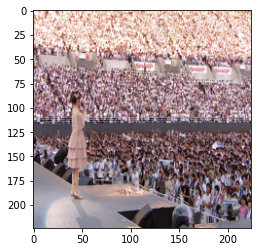

In [29]:
plotter.imshow(prediction_images[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


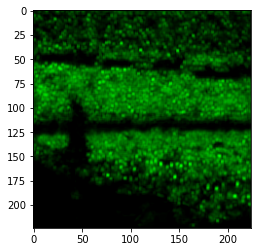

In [30]:
# Create the predicted density map
predicted_density = numpy.full((224, 224, 3), 0)

predicted_density[:,:,1] = prediction[3][:,:,0]

plotter.imshow(predicted_density)

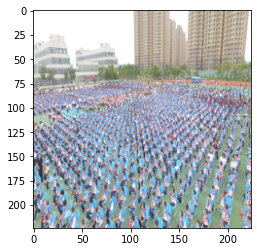

In [38]:
plotter.imshow(prediction_images[4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


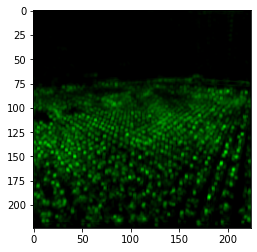

In [41]:
# Create the predicted density map
predicted_density = numpy.full((224, 224, 3), 0)

predicted_density[:,:,1] = prediction[4][:,:,0]

plotter.imshow(predicted_density)

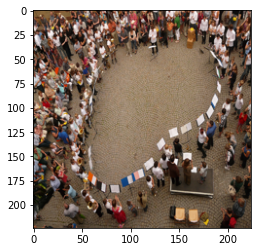

In [33]:
plotter.imshow(prediction_images[5])

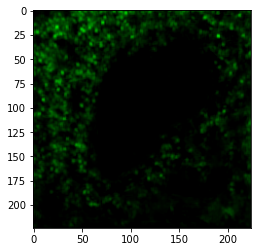

In [34]:
# Create the predicted density map
predicted_density = numpy.full((224, 224, 3), 0)

predicted_density[:,:,1] = prediction[5][:,:,0]

plotter.imshow(predicted_density)

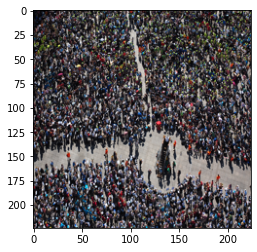

In [35]:
plotter.imshow(prediction_images[6])

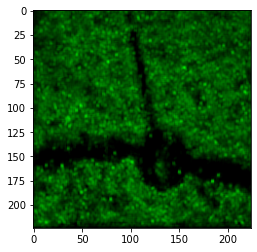

In [36]:
# Create the predicted density map
predicted_density = numpy.full((224, 224, 3), 0)

predicted_density[:,:,1] = prediction[6][:,:,0]

plotter.imshow(predicted_density)